## Importing Libraries

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [ ]:
# Extract tar file

!tar xzvf "/content/drive/MyDrive/test4/lenses.tgz"

In [2]:
# Creating two lists
# X -> Images
# y -> Labels

X = []
y = []

In [5]:
# with sub-structure
sub = os.listdir('/content/lenses/sub')

for i in sub:
    img = cv2.imread('/content/lenses/sub/' + i)
    img = img / 255.0
    X.append(img)
    y.append(1)


# without sub-structure
no_sub = os.listdir('/content/lenses/no_sub')

for i in no_sub:
    img = cv2.imread('/content/lenses/no_sub/' + i)
    img = img / 255.0
    X.append(img)
    y.append(0)

In [6]:
# shufulling the data

data = list(zip(X, y))

np.random.shuffle(data)
X, y = zip(*data)

del data

X = np.array(X)
y = np.array(y)

## Look Around Data

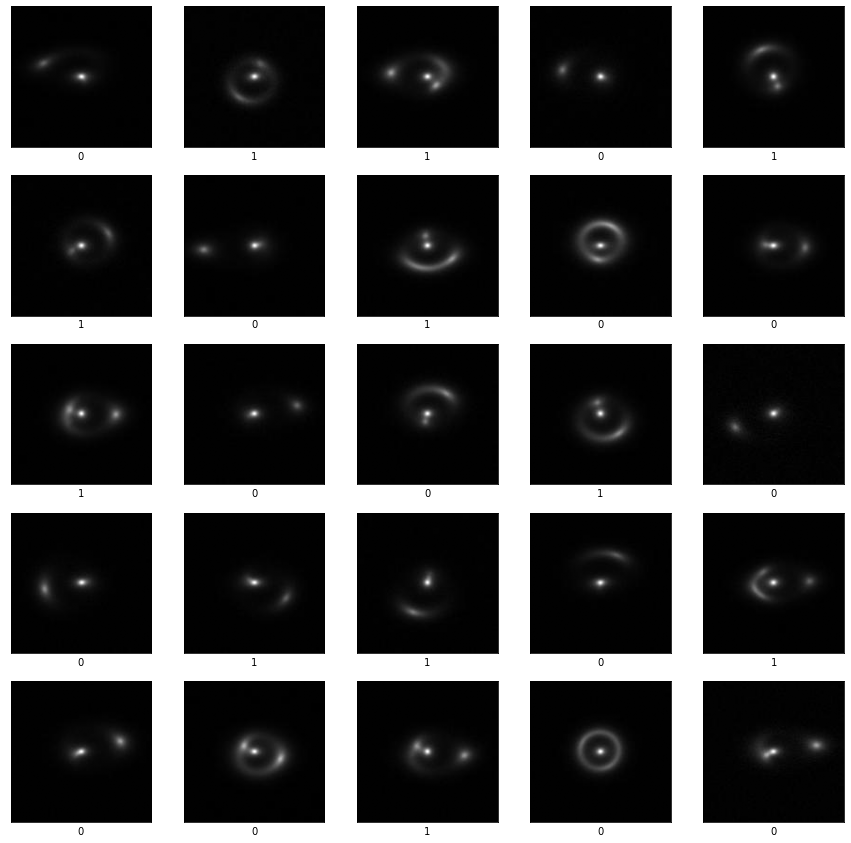

In [7]:
# 5 X 5 grid of random images 

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    num = np.random.randint(0, len(X))
    plt.imshow(X[num])
    plt.xlabel(y[num])
plt.show()

In [8]:
X.shape, y.shape

((10000, 150, 150, 3), (10000,))

In [9]:
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [10]:
del X, y

## Training and Evauation

In [ ]:
# I have used Xception model with input shape (150 X 150 X 3)

model = tf.keras.applications.Xception(
    include_top=True, 
    input_shape=(150, 150, 3),
    weights=None,
    classes=2,
    classifier_activation='softmax'
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [12]:
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
235/235 [==============================] - 178s 680ms/step - loss: 0.5895 - accuracy: 0.6909 - val_loss: 0.9307 - val_accuracy: 0.4924
Epoch 2/50
235/235 [==============================] - 145s 619ms/step - loss: 0.3174 - accuracy: 0.8739 - val_loss: 2.5286 - val_accuracy: 0.4968
Epoch 3/50
235/235 [==============================] - 155s 659ms/step - loss: 0.2389 - accuracy: 0.9092 - val_loss: 169.2682 - val_accuracy: 0.5076
Epoch 4/50
235/235 [==============================] - 145s 618ms/step - loss: 0.1514 - accuracy: 0.9445 - val_loss: 74.1265 - val_accuracy: 0.5076
Epoch 5/50
235/235 [==============================] - 145s 618ms/step - loss: 0.1362 - accuracy: 0.9493 - val_loss: 94.7131 - val_accuracy: 0.5076
Epoch 6/50
235/235 [==============================] - 145s 618ms/step - loss: 0.0902 - accuracy: 0.9689 - val_loss: 22.0664 - val_accuracy: 0.5080
Epoch 7/50
235/235 [==============================] - 145s 618ms/step - loss: 0.0818 - accuracy: 0.9697 - val_loss: 27.

## Plotting ROC

In [13]:
predictions = model.predict(test_X)
temp_predictions = []
for i in range(len(predictions)):
    k = np.argmax(predictions[i])
    temp_predictions.append(k)

temp_predictions = np.array(temp_predictions)

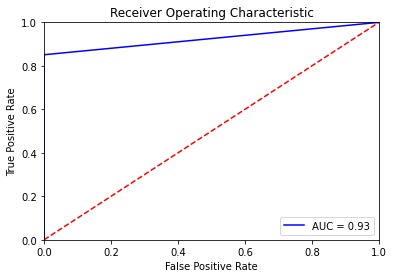

In [14]:
fpr, tpr, thresholds = roc_curve(test_y, temp_predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
model.save('150x15x3_Xception_50epoch_acc92.h5')

## Further Reading

In [ ]:
# We can try another examples such as VGG16, VGG19, MobileNet, EfficientNet etc.
# Can Also try data augmentation
# MOdel can be trained on cloud resources for fast evaluation 

### Sahil bharodiya
#### Email: sahilbharodiya.ppsv2@gmail.com
#### Contact: +91 9173661451
#### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202
#### GitHub: https://www.github.com/SahilBharodiya